In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.preprocessing import Imputer, StandardScaler
import scorecardpy as sc
import numpy as np
import scorecardpy as sc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
LC_final = pd.read_csv('LCFinal.csv')

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1,17,47,56,115,126,127,128,131,132,133,136,142,143,144) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
LC_final.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,leadman,10+ years,MORTGAGE,55000.0,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,Engineer,10+ years,MORTGAGE,65000.0,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
#Eliminate the duplicate
LC_final = LC_final.drop(['funded_amnt','funded_amnt_inv','mo_sin_rcnt_rev_tl_op'], axis = 'columns')
LC_final.head()

,Unnamed: 0,id,member_id,loan_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,0,68407277,NaN,3600.0,36 months,13.99,123.03,leadman,10+ years,MORTGAGE,55000.0,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1,68355089,NaN,24700.0,36 months,11.99,820.28,Engineer,10+ years,MORTGAGE,65000.0,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2,68341763,NaN,20000.0,60 months,10.78,432.

In [6]:
#Drop the rows with too many null data
#thresh_row = len(LC_final.columns)
#LC_final = LC_final.dropna(axis = 'rows', thresh= thresh_row)
#LC_final.shape
#LC_final.head()

In [7]:
#Deal with missing values
missing = LC_final.isna()
num_missing = missing.sum()
missing_percentage = num_missing/len(LC_final)
missing_stat= pd.concat([num_missing, missing_percentage, LC_final.dtypes], axis = 1)
missing_stat.columns = ['missing number', 'missing value percentage', 'data type']
missing_stat = missing_stat.sort_values(by ='missing value percentage', ascending=False)
missing_stat

,missing number,missing value percentage,data type
member_id,2260701,1.000000,float64
orig_projected_additional_accrued_interest,2252050,0.996173,float64
hardship_loan_status,2249784,0.995171,object
hardship_dpd,2249784,0.995171,float64
hardship_reason,2249784,0.995171,object
hardship_status,2249784,0.995171,object
deferral_term,2249784,0.995171,float64
hardship_amount,2249784,0.995171,float64
hardship_start_date,2249784,0.995171,object
hardship_end_date,2249784,0.995171,object


In [8]:
#By looking at the missing value percentage, 
#I choose to drop the column with over 48% missing values
thresh = len(LC_final)* 0.48
LC_final = LC_final.dropna(axis = 'columns', thresh = thresh)
LC_final.shape
LC_final.head()

,Unnamed: 0,id,loan_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,0,68407277,3600.0,36 months,13.99,123.03,leadman,10+ years,MORTGAGE,55000.0,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,Individual,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,1,68355089,24700.0,36 months,11.99,820.28,Engineer,10+ years,MORTGAGE,65000.0,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,Individual,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,2,68341763,20000.0,60 months,10.78,432.66,truck driver,10+ years,MORTGAGE,63000.0,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,0.0,Joint App,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,3,66310712,35000.0,60 months,14.85,829.90,Information Systems Officer,10+ years,MORTGAGE,110000.0,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,Feb-2019,829.90,Mar-2019,679.0,675.0,0.0,Individual,0.0,0.0,301500.0,1.0,1.0,0.0,1.0,23.0,12609.0,70.0,1.0,1.0,6987.0,45.0,67300.0,0.0,1.0,0.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,1.0,2.0,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18

In [9]:
#Check the predictor variable of PD: loan_status
LC_final.loan_status.value_counts()
#There are mainly two cases: fully paid and charged off, so only keep these two categories.

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [10]:
#Keep only fully paid and charged off categories
LC_final = LC_final.loc[LC_final.loan_status.isin(['Fully Paid', 'Charged Off'])]
LC_final.loan_status.value_counts(normalize = True)
#Now 80% of loans was fully paid, and 20% was charged off.

Fully Paid     0.800374
Charged Off    0.199626
Name: loan_status, dtype: float64

In [11]:
#Convert the predictor to 0 or 1: fully paid 0, charged off 1
LC_final.loan_status.replace(('Charged Off', 'Fully Paid'), (1, 0), inplace=True)

In [12]:
#Delete variables that are not necessary for prediction
#Drop the varaible that was not available before the loan

#First is to drop the id, since it does not have any meaning when make predictions, it's unique for each person.
LC_final.drop('id', axis=1, inplace =True)

#Then drop the issue_d, because it means the month which the loan was funded
#Since the variable of interest is only avaible before the loan was funded to make predictions
#So, this is useless, drop it
LC_final.drop('issue_d', axis=1, inplace =True)

#Since earliest_cr_line is a date, so I drop it.
LC_final.drop('earliest_cr_line', axis=1, inplace =True)

In [13]:
#Remove zip_code and addr_state b/c it's personal information that is not useful for precition
#And it's not behaviour information
LC_final.drop(['zip_code','addr_state'], axis=1, inplace =True)

In [14]:
#Keep the recoveries, total_pymnt, installment, annaul_inc, for LGD df
#'last_fico_range_high', last_fico_range_low, 'tot_cur_bal'

#Then drop the varaible that was not available before the a the new loan is applied

LC_final = LC_final.drop(['Unnamed: 0','acc_open_past_24mths','all_util', 'avg_cur_bal',
                         'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee',
                         'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt',
                          'disbursement_method', 'hardship_flag',
                          'il_util','inq_fi','inq_last_6mths', 'initial_list_status',
                          'last_credit_pull_d', 'last_credit_pull_d','last_pymnt_amnt', 'last_pymnt_d', 
                          'max_bal_bc', 'mo_sin_rcnt_tl','mo_sin_old_rev_tl_op', 'mo_sin_old_il_acct',
                          'mths_since_last_delinq', 'mths_since_rcnt_il',
                          'mths_since_recent_bc','mths_since_recent_inq',
                          'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl','num_bc_sats', 'num_bc_tl','num_il_tl',
                          'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd',
                          'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc_6m', 'open_act_il', 'open_il_12m',
                          'open_il_24m','open_rv_12m', 'open_rv_24m','out_prncp','out_prncp_inv', 'pct_tl_nvr_dlq',
                          'percent_bc_gt_75', 'pymnt_plan', 'tax_liens', 'tot_coll_amt', 'tot_hi_cred_lim',
                          'total_bal_ex_mort','total_bal_il','total_bc_limit', 'total_cu_tl', 'total_il_high_credit_limit',
                          'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim',
                          'url'], axis = 'columns')

In [15]:
len(LC_final.columns)

29

In [16]:
sorted(LC_final.columns)

['acc_now_delinq',
 'annual_inc',
 'application_type',
 'dti',
 'emp_length',
 'emp_title',
 'fico_range_high',
 'fico_range_low',
 'home_ownership',
 'inq_last_12m',
 'installment',
 'int_rate',
 'last_fico_range_high',
 'last_fico_range_low',
 'loan_amnt',
 'loan_status',
 'mort_acc',
 'open_acc',
 'pub_rec',
 'pub_rec_bankruptcies',
 'purpose',
 'recoveries',
 'revol_bal',
 'revol_util',
 'term',
 'title',
 'tot_cur_bal',
 'total_acc',
 'total_pymnt']

In [17]:
#Continue checking missing values with those 30 variables
LC_final.isnull().any()

loan_amnt               False
term                    False
int_rate                False
installment             False
emp_title                True
emp_length               True
home_ownership          False
annual_inc              False
loan_status             False
purpose                 False
title                    True
dti                      True
fico_range_low          False
fico_range_high         False
open_acc                False
pub_rec                 False
revol_bal               False
revol_util               True
total_acc               False
total_pymnt             False
recoveries              False
last_fico_range_high    False
last_fico_range_low     False
application_type        False
acc_now_delinq          False
tot_cur_bal              True
inq_last_12m             True
mort_acc                 True
pub_rec_bankruptcies     True
dtype: bool

In [18]:
#Check the number of missing value in the remaining variable
pd.isnull(LC_final).sum()

loan_amnt                    0
term                         0
int_rate                     0
installment                  0
emp_title                85785
emp_length               78511
home_ownership               0
annual_inc                   0
loan_status                  0
purpose                      0
title                    16659
dti                        374
fico_range_low               0
fico_range_high              0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                 857
total_acc                    0
total_pymnt                  0
recoveries                   0
last_fico_range_high         0
last_fico_range_low          0
application_type             0
acc_now_delinq               0
tot_cur_bal              67527
inq_last_12m            807713
mort_acc                 47281
pub_rec_bankruptcies       697
dtype: int64

In [19]:
#So, missing values variables;
#emp_title, emp_length, title, dti, revol_tuil, tot_cur_bal, 
#inq_last_12m, mort_acc, pub_rec_bankruptcies

#For emp_title: 
#Data Dictionary: The job title supplied by the Borrower when applying for the loan.
display(LC_final.emp_title.value_counts())
len(LC_final.emp_title.unique())

Teacher                          21268
Manager                          19470
Owner                            10302
Registered Nurse                  8774
RN                                8522
                                 ...  
ICS Assosiate                        1
Rusk State Hospital                  1
Chief, Internal Enforcement          1
Morneau Shepell SBC Limited          1
Director of public relations         1
Name: emp_title, Length: 378353, dtype: int64

378354

In [20]:
#Since there are too many unique categories in this variable, so just drop it.
LC_final.drop('emp_title', axis=1, inplace =True)

In [21]:
#Next is to examine emp_length
#Employment length in years. 
#Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
display(LC_final.emp_length.value_counts(dropna = False).sort_index())

1 year        88494
10+ years    442199
2 years      121743
3 years      107597
4 years       80556
5 years       84154
6 years       62733
7 years       59624
8 years       60701
9 years       50937
< 1 year     108061
NaN           78511
Name: emp_length, dtype: int64

In [22]:
#Convert string to numerical data
LC_final.emp_length.replace ('< 1 year', '0', inplace = True)
LC_final.emp_length.replace ('1 year', '1', inplace = True)
LC_final.emp_length.replace ('2 years', '2', inplace = True)
LC_final.emp_length.replace ('3 years', '3', inplace = True)
LC_final.emp_length.replace ('4 years', '4', inplace = True)
LC_final.emp_length.replace ('5 years', '5', inplace = True)
LC_final.emp_length.replace ('6 years', '6', inplace = True)
LC_final.emp_length.replace ('7 years', '7', inplace = True)
LC_final.emp_length.replace ('8 years', '8', inplace = True)
LC_final.emp_length.replace ('9 years', '9', inplace = True)
LC_final.emp_length.replace ('10+ years', '10', inplace = True)

#Delete the rows with missing values
LC_final = LC_final.dropna(axis = 0,subset=['emp_length'])
#Check the dropped missing value+converted numbers 
display(LC_final.emp_length.value_counts(dropna = False).sort_index())
display(LC_final.emp_length.isnull().any())

0     108061
1      88494
10    442199
2     121743
3     107597
4      80556
5      84154
6      62733
7      59624
8      60701
9      50937
Name: emp_length, dtype: int64

False

In [23]:
#Next deal with title
#The loan title provided by the borrower
display(LC_final.title.value_counts())
LC_final.purpose.value_counts()
#Since it's basically the same as purpose, and purpose cover more info
#So we can drop this variable
LC_final = LC_final.drop('title', axis=1)

Debt consolidation           623195
Credit card refinancing      234346
Home improvement              69490
Other                         61766
Major purchase                22621
                              ...  
Getting things straight           1
Personal Debt Restructure         1
partnertship business             1
Three Year Fixed                  1
Bottom line is                    1
Name: title, Length: 59498, dtype: int64

In [24]:
LC_final.purpose

0          debt_consolidation
1              small_business
2            home_improvement
4              major_purchase
5          debt_consolidation
                  ...        
2260688      home_improvement
2260690    debt_consolidation
2260691      home_improvement
2260692               medical
2260697    debt_consolidation
Name: purpose, Length: 1266799, dtype: object

In [25]:
#Then deal with dti, since it's continuous variable and it does not have that much missing values
#I replace the missing values with its median
LC_final.dti.fillna(LC_final.dti.median(), inplace=True)
LC_final.dti.isnull().any()

False

In [26]:
#Check with revol_util
#Revolving line utilization rate, 
#or the amount of credit the borrower is using relative to all available revolving credit.

#Fill missing values with median (as median is robust to outliers)
LC_final.revol_util.fillna(LC_final.revol_util.median(), inplace=True)
LC_final.revol_util.isnull().any()

False

In [27]:
#Fill missing value with median for tot_cur_bal
LC_final.tot_cur_bal.fillna(LC_final.tot_cur_bal.median(), inplace=True)
LC_final.tot_cur_bal.isnull().any()

False

In [28]:
#Check with mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mort_acc, pub_rec_bankruptcies
#Months since oldest bank installment account opened

#Fill missing values with median (as median is robust to outliers)
LC_final.inq_last_12m.fillna(LC_final.inq_last_12m.median(), inplace=True)
LC_final.tot_cur_bal.fillna(LC_final.tot_cur_bal.median(), inplace=True)
LC_final.mort_acc.fillna(LC_final.mort_acc.median(), inplace=True)
LC_final.pub_rec_bankruptcies.fillna(LC_final.pub_rec_bankruptcies.median(), inplace=True)

In [29]:
LC_final.isnull().any()

loan_amnt               False
term                    False
int_rate                False
installment             False
emp_length              False
home_ownership          False
annual_inc              False
loan_status             False
purpose                 False
dti                     False
fico_range_low          False
fico_range_high         False
open_acc                False
pub_rec                 False
revol_bal               False
revol_util              False
total_acc               False
total_pymnt             False
recoveries              False
last_fico_range_high    False
last_fico_range_low     False
application_type        False
acc_now_delinq          False
tot_cur_bal             False
inq_last_12m            False
mort_acc                False
pub_rec_bankruptcies    False
dtype: bool

In [30]:
display(LC_final.term.value_counts())
#Convert term into numerical data
LC_final.term.replace (' 36 months', '36', inplace = True)
LC_final.term.replace (' 60 months', '60', inplace = True)

 36 months    954543
 60 months    312256
Name: term, dtype: int64

In [31]:
#Perform correlataion test
corr = LC_final.corr()
corr.loc[:,:] = np.tril(corr, k=-1) # below main lower triangle of an array
cor = corr.stack()
cor[(cor > 0.5) | (cor < -0.5)]

installment           loan_amnt               0.952668
fico_range_high       fico_range_low          1.000000
total_acc             open_acc                0.702202
total_pymnt           loan_amnt               0.853841
                      installment             0.814635
recoveries            loan_status             0.512343
last_fico_range_high  loan_status            -0.668751
last_fico_range_low   loan_status            -0.577781
                      last_fico_range_high    0.829971
mort_acc              tot_cur_bal             0.530478
pub_rec_bankruptcies  pub_rec                 0.646460
dtype: float64

In [32]:
#So installment and loan amount has high correlatoin: 0.952668
#fico_range_high and fico_range_low has high correlation: 1
#total_acc and open_acc has high correlation: 0.702202, but total_acc has smaller with y
#total_pymnt with loan_amnt & installment, but total_pymnt has higher relation with 
#last_fico_range_high and loast_fico_range_low has high correlation but, high has higher
#mort_acc and tot_cur_bal : 0.53, but both has very small with y
#pub_rec_bankruptcies and pub_rec has high correlatoin: 0.646460, but they are pretty similar

In [33]:
#Check those variables with predictor's correlation
#Keep one with higher correlation with loan_status for high-correlated pairs
LC_final.corr().loan_status

loan_amnt               0.071731
int_rate                0.260354
installment             0.056867
annual_inc             -0.037830
loan_status             1.000000
dti                     0.095197
fico_range_low         -0.131718
fico_range_high        -0.131717
open_acc                0.032636
pub_rec                 0.025749
revol_bal              -0.018636
revol_util              0.060214
total_acc              -0.008365
total_pymnt            -0.311607
recoveries              0.512343
last_fico_range_high   -0.668751
last_fico_range_low    -0.577781
acc_now_delinq          0.003808
tot_cur_bal            -0.064072
inq_last_12m            0.045379
mort_acc               -0.072120
pub_rec_bankruptcies    0.024466
Name: loan_status, dtype: float64

In [34]:
LC_final = LC_final.assign(fico = (LC_final.fico_range_low + LC_final.fico_range_high)/2)
#The correlation of fico_range_low and fico_range_high is 1, so we take the mean value of these two columns
#and drop them
LC_final = LC_final.drop(['fico_range_low','fico_range_high'], axis = 1)

In [35]:
LC_final = LC_final.assign(last_fico = (LC_final.last_fico_range_high + LC_final.last_fico_range_low)/2)
#The correlation of last_fico_range_low and fico_range_high is 1, so we take the mean value of these two columns
#and drop them
LC_final = LC_final.drop(['last_fico_range_high','last_fico_range_low'], axis = 1)

In [36]:
LC_final.fico.describe()

count    1.266799e+06
mean     6.981258e+02
std      3.166295e+01
min      6.270000e+02
25%      6.720000e+02
50%      6.920000e+02
75%      7.120000e+02
max      8.475000e+02
Name: fico, dtype: float64

In [37]:
#Now copy this dataframe to LGD model for further feature selection
#And clean the data for PD model
lgd_df = LC_final.copy()

In [38]:
#Drop the variable that is not useful for predicting PD: total_pymnt, recoveries, tot_cur_bal,
LC_final = LC_final.drop(['total_pymnt','tot_cur_bal','recoveries'], axis =1)

In [39]:
#pair3
LC_final[['total_acc', 'open_acc','loan_status']].corr()
#keep open_acc

,total_acc,open_acc,loan_status
total_acc,1.000000,0.702202,-0.008365
open_acc,0.702202,1.000000,0.032636
loan_status,-0.008365,0.032636,1.000000


In [40]:
#pair 3, drop the total_acc
LC_final = LC_final.drop(['total_acc'], axis =1)
lgd_df= lgd_df.drop(['total_acc'], axis =1)

In [41]:
#pair4, 
LC_final[['loan_amnt', 'installment','loan_status']].corr()

,loan_amnt,installment,loan_status
loan_amnt,1.000000,0.952668,0.071731
installment,0.952668,1.000000,0.056867
loan_status,0.071731,0.056867,1.000000


In [42]:
#delete total_pymnt for pd, b/c it's not useful for predicting
#delete installment for pd
LC_final = LC_final.drop(['installment'], axis =1)

In [43]:
#last pair
LC_final[['pub_rec', 'pub_rec_bankruptcies','loan_status']].corr()

,pub_rec,pub_rec_bankruptcies,loan_status
pub_rec,1.000000,0.646460,0.025749
pub_rec_bankruptcies,0.646460,1.000000,0.024466
loan_status,0.025749,0.024466,1.000000


In [44]:
#Delete pub_rec_bankruptcies
LC_final = LC_final.drop(['pub_rec_bankruptcies'], axis =1)

In [45]:
#Outlier detection
sorted(LC_final.columns)

['acc_now_delinq',
 'annual_inc',
 'application_type',
 'dti',
 'emp_length',
 'fico',
 'home_ownership',
 'inq_last_12m',
 'int_rate',
 'last_fico',
 'loan_amnt',
 'loan_status',
 'mort_acc',
 'open_acc',
 'pub_rec',
 'purpose',
 'revol_bal',
 'revol_util',
 'term']

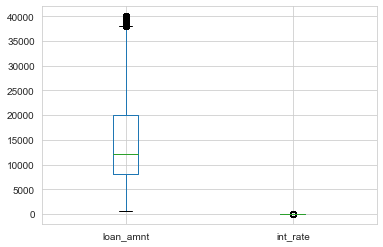

In [46]:
#Plot the boxplot to see if there is any outlier in the remaining variable
LC_final.iloc[:,:5].boxplot(return_type='axes');
#loan_amnt

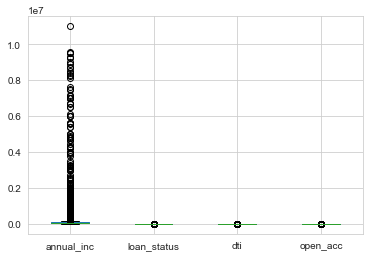

In [47]:
LC_final.iloc[:,5:10].boxplot(return_type='axes');
# annual_inc has outliers

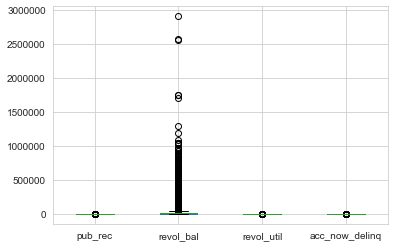

In [48]:
LC_final.iloc[:,10:15].boxplot(return_type='axes');
#revol_bal

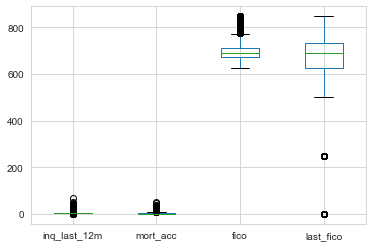

In [49]:
LC_final.iloc[:,15:20].boxplot(return_type='axes');
#inq_last_12mo,mort_acc
#fico

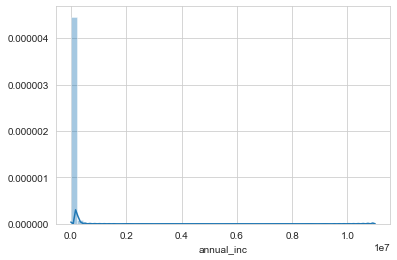

In [50]:
#Check the histogram of these plots
sns.distplot(LC_final['annual_inc'])

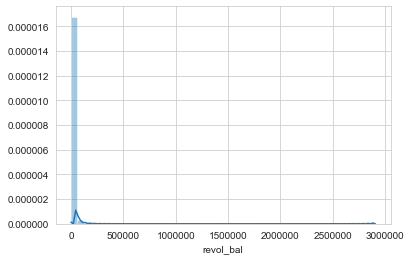

In [51]:
sns.distplot(LC_final['revol_bal'])

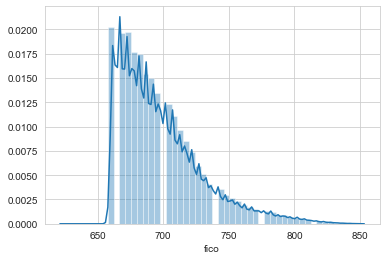

In [52]:
sns.distplot(LC_final['fico'])

In [53]:
#These variables need to be trimmed
#Truncate to median+/- 3s
#s = IQR/(2*0.6745)
outlier_cols = ['annual_inc','inq_last_12m','fico','revol_bal',
                'mort_acc','loan_amnt']

for c in outlier_cols:
    value = LC_final[c]
    q1 = LC_final[c].quantile(0.25)
    q3 = LC_final[c].quantile(0.75)
    iqr = q3-q1
    lower = np.median(value)-(3*iqr)/(2*0.6745)
    upper = np.median(value)+(3*iqr)/(2*0.6745)
    LC_final.loc[value<lower,c] = lower
    LC_final.loc[value>upper,c] = upper              

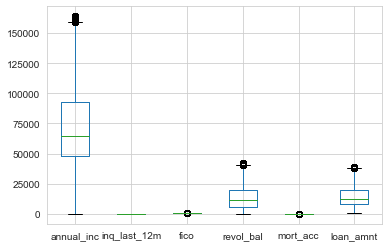

In [54]:
#Check the boxplot again
LC_final.boxplot(outlier_cols,return_type='axes');
#From the boxplot, we can see that outliers are removed

In [55]:
#The data is cleaned by dealing with missing values and outliers
#Now weight of evidence can be applied to each variable
!pip install scorecardpy


In [56]:
# Split in train and test BEFORE we apply WoE to model PD
# Use your Student ID as seed!
train, test = sc.split_df(LC_final,
                          y = LC_final['loan_status'],
                          ratio = 0.7, seed = 251124578).values()
train.describe()

,loan_amnt,int_rate,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,acc_now_delinq,inq_last_12m,mort_acc,fico,last_fico
count,886759.000000,886759.000000,886759.000000,886759.000000,886759.000000,886759.000000,886759.000000,886759.000000,886759.000000,886759.000000,886759.0,886759.000000,886759.000000,886759.000000
mean,14596.402603,13.231403,74085.981114,0.195318,18.130766,11.670816,0.208506,14528.513468,52.054815,0.005104,2.0,1.615579,697.691203,669.130923
std,8726.555932,4.771377,35914.770264,0.396446,9.473092,5.488830,0.603251,11272.829910,24.474023,0.078187,0.0,1.869058,30.170588,102.474718
min,500.000000,5.310000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,0.000000,632.000000,0.000000
25%,8000.000000,9.750000,48000.000000,0.000000,11.740000,8.000000,0.000000,6043.000000,33.800000,0.000000,2.0,0.000000,672.000000,627.000000
50%,12125.000000,12.740000,65000.000000,0.000000,17.520000,11.000000,0.000000,11287.000000,52.500000,0.000000,2.0,1.000000,692.000000,692.000000
75%,20000.000000,15.990000,92500.000000,0.000000,23.920000,14.000000,0.000000,19962.000000,70.900000,0.000000,2.0,3.000000,712.000000,732.000000
max,38761.434396,30.990000,163962.194218,1.000000,999.000000,90.000000,86.000000,42274.845812,892.300000,14.000000,2.0,7.671609,780.954781,847.500000


In [ ]:
bins = sc.woebin(train, y = 'loan_status', 
                 min_perc_fine_bin=0.05, # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.1, # Minimum information value 
                 max_num_bin=8, # Maximum number of bins
                 method='tree')

[INFO] creating woe binning ...


//anaconda3/lib/python3.7/site-packages/scorecardpy/condition_fun.py:19: UserWarning: There are 1 columns have only one unique values, which are removed from input dataset. 
 (ColumnNames: inq_last_12m)
  warnings.warn("There are {} columns have only one unique values, which are removed from input dataset. \n (ColumnNames: {})".format(len(unique1_cols), ', '.join(unique1_cols)))


In [ ]:
LC_final.head()

In [ ]:
sc.woebin_plot(bins)

In [ ]:
train_woe = sc.woebin_ply(train, bins) # Calculate WoE dataset (train)
test_woe = sc.woebin_ply(test, bins) # Calculate WoE dataset (test)

In [ ]:
train_woe.head()

In [ ]:
#Information value filtering
#Suggest to remove if <0.02
sc.iv(train_woe, 'loan_status')
#drop the last_fico, b/c it's too good to be true

In [ ]:
train_woe.columns

In [ ]:
#Choose the previous 6 variables
accepted_range = ['int_rate_woe', 'term_woe', 'fico_woe', 'dti_woe','mort_acc_woe','loan_amnt_woe','home_ownership_woe',
                 'revol_util_woe','annual_inc_woe']
train_woe = train_woe.loc[:, accepted_range]
test_woe = test_woe.loc[:, accepted_range]
train_woe = train_woe.assign(loan_status = train.loan_status)
test_woe = test_woe.assign(loan_status = test.loan_status)
train_woe.head()

In [ ]:
#Save the result
#train_woe.to_csv("train_woe.csv", index = False)
#test_woe.to_csv("test_woe.csv", index = False)
#!ls # Linux commands to check what files are in the computer.
#from google.colab import files
#files.download("train_woe.csv")

In [ ]:
LC_final_logreg = LogisticRegression(penalty='l1', # Type of penalization l1 = lasso, l2 = ridge
                                     tol=0.0001, # Tolerance for parameters
                                     C=100, # Penalty constant, see below
                                     fit_intercept=True, # Use constant?
                                     class_weight='balanced', # Weights, see below
                                     random_state=20190301, # Random seed
                                     max_iter=100, # Maximum iterations
                                     verbose=1, # Show process. 1 is yes.
                                     solver = 'saga',
                                     warm_start=False # Train anew or start from previous weights. For repeated training. 
                                    )


In [ ]:
#Training
Xtrain= train_woe.drop("loan_status",axis=1)
LC_final_logreg.fit(X = Xtrain, # All rows and from the second var to end
                    y = train_woe['loan_status'] # The target
                   )

In [ ]:
#Let's check the parameters, sorted into a nice table.
coef_df = pd.concat([pd.DataFrame({'column': train_woe.columns[:-1]}), 
                    pd.DataFrame(np.transpose(LC_final_logreg.coef_))],
                    axis = 1
                   )

coef_df

In [ ]:
#The intercept should be close to 0
#This is expected in a balanced logistic regression that uses WoE transform 
#and is a way to check everything is working as intended.
LC_final_logreg.intercept_

In [ ]:
#Apply to the test set 
pred_class_test = LC_final_logreg.predict(test_woe.iloc[:, :-1])
probs_test = LC_final_logreg.predict_proba(test_woe.iloc[:, :-1])
print(probs_test[0:5], pred_class_test[0:5])

In [ ]:
confusion_matrix(y_true = test_woe['loan_status'], y_pred = pred_class_test)

In [ ]:
pred_class_test

In [ ]:
#A nicer matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    ax.axis('equal')
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    return ax

ypreds = pred_class_test
ytrain = test_woe['loan_status']

plot_confusion_matrix(ytrain, ypreds, classes = np.array([0.0,1.0]));
cm = confusion_matrix(ytrain, ypreds)

# Sum of diagonal entries divided by total sum
model_accuracy = np.diag(cm).sum()/cm.sum()

# Bottom right divided by sum of second column
model_precision = cm[1,1]/np.sum(cm[:,1])

# Bottom right divided by sum of second row
model_recall = cm[1,1]/np.sum(cm[1,:])

print(f"Model Acuracy is {model_accuracy:.2f}")
print(f"Model Recall is {model_recall:.2f}")




In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(test.loan_status, probs_test[:,1])

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = test.loan_status, y_score = probs_test[:,1]),decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="pd RF, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
#Scorecards
LC_final_sc = sc.scorecard(bins, LC_final_logreg, 
             train_woe.columns[1:], # The column names in the trained LR
             points0=600, # Base points
             odds0=0.01, # Base odds
             pdo=50) # PDO 


In [ ]:
LC_final_sc

In [ ]:
#turn all category var into dummy var
lgd_df.head()
lgd_df = pd.get_dummies(lgd_df)

In [ ]:
#Work out LGD
#LGD : the amount of money a bank or other financial institutions loses when a borrower defaults on a loan
#LGD = loss/(possible loss)
#Recoveries = what do you get after the default
#= (how much people owe - how much people pay)/how much people owe
#LGD = 1 - recoveries/EAD (the percentage you lose)
#EAD = what you default at time =  installment*terms (how much they owe)-toatal payment(how much they pay)
#Model LGD:
#loan information: collateral, EAD(installmnet*term-total payment), interest rate, rating
#personal info: annual income, debt amount, bank acount balance, 
#account balance = 


In [ ]:
lgd_df.term = lgd_df.term.astype(float)

In [ ]:
lgd_df = lgd_df.assign(ead = lgd_df.installment*lgd_df.term-lgd_df.total_pymnt)
lgd_df = lgd_df[lgd_df.ead > 0]

In [ ]:
lgd_df = lgd_df.assign(lgd = 1-lgd_df.recoveries/lgd_df.ead)

In [ ]:
lgd_df.lgd

In [ ]:
lgd_df2 = lgd_df[lgd_df.loan_status != 0]

In [ ]:
#clean lgd 
#check correlation
lgd_corr = lgd_df2.corr()
lgd_corr.loc[:,:] = np.tril(lgd_corr, k=-1) # below main lower triangle of an array
lgd_cor = lgd_corr.stack()
lgd_cor[(lgd_cor > 0.5) | (lgd_cor < -0.5)]

In [ ]:
lgd_df2[['total_pymnt', 'loan_amnt', 'installment','tot_cur_bal','lgd']].corr()
#keep total_pymnt drop the rest

In [ ]:
lgd_df2 = lgd_df2.drop(['loan_amnt', 'installment','tot_cur_bal'],axis =1)
#keep total_pymnt drop the rest

In [ ]:
lgd_df2[['pub_rec_bankruptcies', 'pub_rec', 'lgd']].corr()

In [ ]:
lgd_df2 = lgd_df2.drop(['pub_rec_bankruptcies', 'pub_rec'],axis=1)
#drop the both, b/c i think they are not useful for predicting lgd

In [ ]:
lgd_df2[['ead', 'term','lgd']].corr()
#keep term b/c ead is calculated from term

In [ ]:
lgd_df2 = lgd_df2.drop('ead',axis=1)

In [ ]:
#turn all category var into dummy var
lgd_df2 = pd.get_dummies(lgd_df2)

In [ ]:
sorted(lgd_df2.columns)

In [ ]:
lgd_df2.head()

In [ ]:
lgd_df2.corr().lgd

In [ ]:
sorted(abs(lgd_df2.corr().lgd))

In [ ]:
#accepted_col = ['term','total_pymnt','int_rate','annual_inc','last_fico','revol_bal',
#               'mort_acc','lgd']
#lgd_df2 = lgd_df2[accepted_col]

In [ ]:
#Perform random forest
from sklearn.ensemble import RandomForestRegressor
lgd_rf = RandomForestRegressor(n_estimators=1000, # Number of trees to train
                       max_depth=None, # Max depth of the trees. Not necessary to change.
                       min_samples_split=2, # Minimum samples to create a split.
                       min_samples_leaf=0.001, # Minimum samples in a leaf. Accepts fractions for %. This is 0.1% of sample.
                       min_weight_fraction_leaf=0.0, # Same as above, but uses the class weights.
                       max_features='auto', # Maximum number of features per split (not tree!) by default is sqrt(vars)
                       max_leaf_nodes=None, # Maximum number of nodes.
                       min_impurity_decrease=0.0001, # Minimum impurity decrease. This is 10^-3.
                       bootstrap=True, # If sample with repetition. For large samples (>100.000) set to false.
                       oob_score=True,  # If report accuracy with non-selected cases.
                       n_jobs=-1, # Parallel processing. Set to -1 for all cores. Watch your RAM!!
                       random_state=251124578, # Seed
                       verbose=1, # If to give info during training. Set to 0 for silent training.
                       warm_start=False, # If train over previously trained tree
                                    )

In [ ]:
#Resplit the train set and test set
#The objective variable is only charged off, so we drop the rows that is not charged off.
lgd_train_noWoE, lgd_test_noWoE = sc.split_df(lgd_df2,
                                                        y = 'lgd',
                                                        ratio = 0.7,
                                                        seed = 251124578).values()


In [ ]:
lgd_train_noWoE.describe()

In [ ]:
lgd_train_x = lgd_train_noWoE.drop("lgd",axis=1)

In [ ]:
lgd_rf.fit(lgd_train_x, 
               lgd_train_noWoE['lgd'])

In [ ]:
lgd_test_x = lgd_test_noWoE.drop("lgd",axis=1)

In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve

# Apply the model to the test set.
rf_pred_class_test = lgd_rf.predict(lgd_test_x)
#rf_probs_test = lgd_rf.predict_proba(lgd_test_x)

In [ ]:
#Calculate cross validatoin score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, confusion_matrix, mean_absolute_error

cv_scores = cross_val_score(lgd_rf, lgd_train_x, lgd_train_noWoE['lgd'], cv = 5, scoring=make_scorer(mean_absolute_error))
print(cv_scores)
print(f"Model CV score is {cv_scores.mean():.2f}")

In [ ]:
for name, importance in zip(lgd_train_noWoE.columns[:-1], lgd_rf.feature_importances_):
  print(name, "= %.2f" % importance)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
lgd_xg = GradientBoostingRegressor(
                           learning_rate=0.1, # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                           n_estimators=100, # How many trees to use, the more the better, but decrease learning rate if many used.
                           subsample=0.632, # Subsampling to use. 63.2% of data is standard for XGBoost.
                           criterion='friedman_mse', # Error to use for each split. Good idea to leave it as is.
                           min_samples_split=2, # Minimum samples for a split.
                           min_samples_leaf=1, # Minimum samples in a leaf.
                           min_weight_fraction_leaf=0.0, # Minimum fraction of samples in a leaf. Consider increasing if first few trees too good.
                           max_depth=3, # Maximum depth. Keep it small!
                           min_impurity_decrease=0.01, # Minimum impurity decrease. Might want to use 1% or so.
                           init=None, # How to make first prediction (it needs one). Can give model that supports fit and predict.
                           random_state=20190305, # Seed
                           max_features='auto', # Same as RF. 
                           verbose=1,  # Same as RF.
                           max_leaf_nodes=None,  # Same as RF.
                           warm_start=False,  # Same as RF.
                           presort='auto', # Whether to presort the data to speed up training.
                           validation_fraction=0.3, # XGBoost CAN overfit, so control this just in case. Uses 30% validation in this case.
                           n_iter_no_change=None, # Iters to stop training if no change occurs between one tree and the next.
                           tol=0.0001 # Tolerance. Means maximum change of 10^-4
                          )

In [ ]:
lgd_xg.fit(lgd_train_x, 
               lgd_train_noWoE['lgd'])

In [ ]:
#Calculate cross validatoin score

cv_scores = cross_val_score(lgd_xg, lgd_train_x, lgd_train_noWoE['lgd'], cv = 5, scoring=make_scorer(mean_absolute_error))
print(cv_scores)
print(f"Model CV score is {cv_scores.mean():.2f}")

In [ ]:
#check the variable importance
plt.barh(lgd_test_noWoE.iloc[:, :-1].columns, lgd_xg.feature_importances_,
        align='center', alpha=0.5)
plt.yticks(lgd_test_noWoE.iloc[:, :-1].columns)
plt.xlabel('Importance')
plt.title('XGBoosting Variable Importance')
plt.show()